<a href="https://colab.research.google.com/github/melisamichuki01/moringa_project/blob/master/Hypothyroidism_SVM_Project_Melisa_Michuki_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question

## The analytical question


As a data scientist,build on model that determines whether or not the patient's symptoms indicate that the patient has hypothyroidism.

## Metric of success.

To achieve a model with over 90 % accuracy

##  Understanding the context.

>A condition in which the thyroid gland doesn't produce enough thyroid hormone.
Hypothyroidism's deficiency of thyroid hormones can disrupt such things as heart rate, body temperature and all aspects of metabolism. Hypothyroidism is most prevalent in older women.
Major symptoms include fatigue, cold sensitivity, constipation, dry skin and unexplained weight gain.
Treatment consists of thyroid hormone replacement

>Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.

>We are required to create a model that will determines whether or not the patient's symptoms indicate that the patient has hypothroidism

## Recording the experimental design.

> * Decision trees

---



Here,we will make use of 2 of the advanced models i.e; Random forest,Ada boosted trees and grandient boosted trees.

> * SVM 

---



In this method,we will begin with carrying out data cleaning,tune our parameters and finally apply the Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best.

Once we have the best kernel,we will use this kernel together with your tuned parameters and repeat the prediction but this time using additional features.We will then compare the model you've just created with the 2-features version.

## Data relevance

The data provided was relevant to this study.It is suitable to carry out analysis and give the output needed

In [0]:
import pandas as pd

In [2]:
Hdf = pd.read_csv('/content/hypothyroid.csv')
Hdf.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


#Importing libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

# Loading our dataset

In [4]:
Hdf = pd.read_csv('/content/hypothyroid.csv')
Hdf.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


# Checking the data

In [5]:
# Preview of the head of the dataset
#----
Hdf.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [6]:
# Preview of the tail of the dataset
# -----
Hdf.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [7]:
# Check for the types of data types we have
# -----
Hdf.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [8]:
# Check for unique values in our dataset
# -----
for columns in Hdf.columns:
  print('/n')
  print(Hdf[columns].unique())

/n
['hypothyroid' 'negative']
/n
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
/n
['M' 'F' '?']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['y' 'n']
/n
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43'

In [9]:
# Summary of central tendencies
# -----
Hdf.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [10]:
# Summary of central tendencies based on the status
# ----
Hdf.groupby('status').describe()

age                   sex         ... TBG_measured         TBG                 
            count unique top freq count unique  ...          top  freq count unique top  freq
status                                          ...                                          
hypothyroid   151     51   ?   15   151      3  ...            n   148   151      3   ?   148
negative     3012     92   ?  431  3012      3  ...            n  2755  3012     53   ?  2755

[2 rows x 100 columns]

# Tidying our dataset

In [0]:
# Replace the "?" with Nan 

Hdf=Hdf.replace(['?'],np.nan)

In [12]:
# Based on our previous processes,we have to make some changes on the datatypes
# of some of the columns which should be numerical
# ------

Hdf[['age','TSH','T3','TT4','T4U','FTI']] = Hdf[['age','TSH','T3','TT4','T4U','FTI']].apply(pd.to_numeric)
Hdf.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                           object
dtype: object

In [13]:
Hdf.isna().any()

status                       False
age                           True
sex                           True
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
thyroid_surgery              False
query_hypothyroid            False
query_hyperthyroid           False
pregnant                     False
sick                         False
tumor                        False
lithium                      False
goitre                       False
TSH_measured                 False
TSH                           True
T3_measured                  False
T3                            True
TT4_measured                 False
TT4                           True
T4U_measured                 False
T4U                           True
FTI_measured                 False
FTI                           True
TBG_measured                 False
TBG                           True
dtype: bool

In [0]:
#we will the replace with the mode of each and every column
for column in Hdf.columns:
    Hdf[column].fillna(Hdf[column].mode()[0])

In [15]:
numeric = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

for col in numeric:
  Hdf[[col]] = Hdf[[col]].apply(pd.to_numeric)

Hdf.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [16]:
Hdf.shape

(3163, 26)

In [0]:
# We remove whitespaces from our rows
# We also ensure that our rows are of the same case
#Hdf.columns = Hdf.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '_').str.replace(',','')
#Hdf.head()

## Outliers

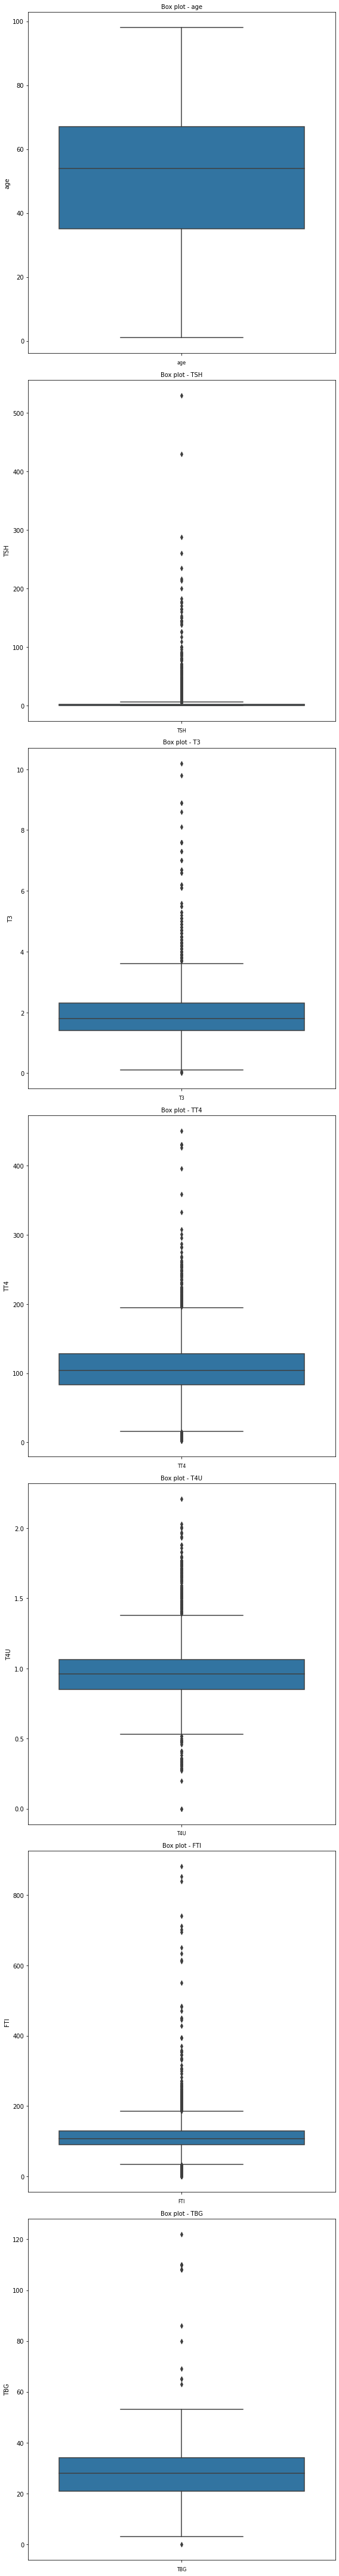

In [18]:
#checking for outliers in our dataset
col_names = numeric_clmns =Hdf.dtypes[Hdf.dtypes != "object" ].index

fig, ax = plt.subplots(len(col_names), figsize=(8,60))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=Hdf[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.tight_layout()
plt.show()

# EDA

## Univariate analysis

### Histograms

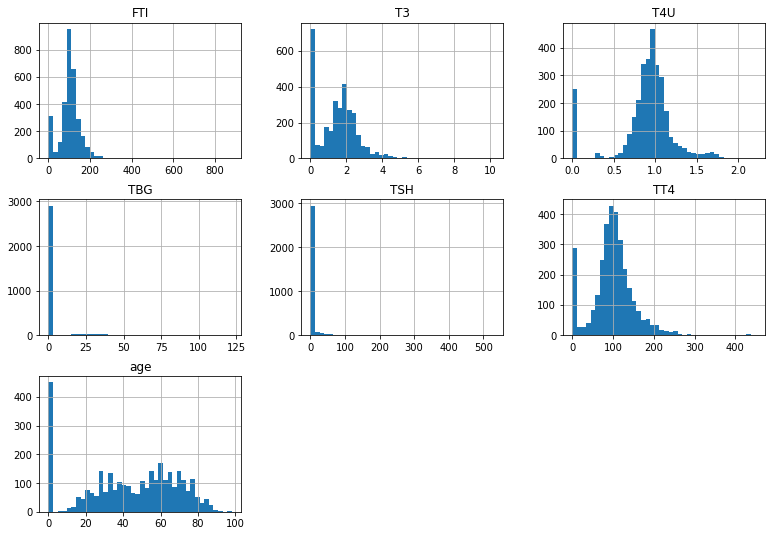

In [125]:
# Histograms
Hdf.hist(bins=40, figsize=(13,9))
plt.show()

### Frequency distributions

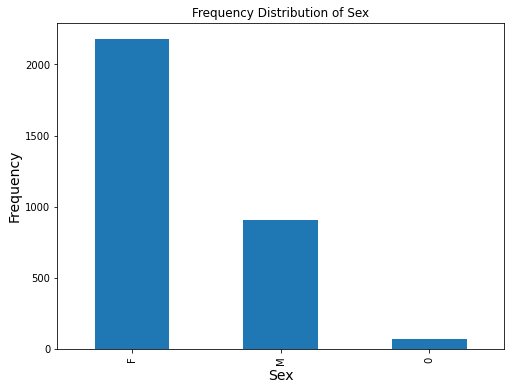

In [126]:

# Checking for the frequency distribution of the sex variable Using a bar plot.

fig, ax = plt.subplots(figsize = (8, 6))

Hdf['sex'].value_counts().plot.bar(title = 'Frequency Distribution of Sex')
plt.xlabel('Sex', color = 'black', fontsize = 14)
plt.ylabel('Frequency', color = 'black', fontsize = 14)
plt.show()

Most of the patients were female

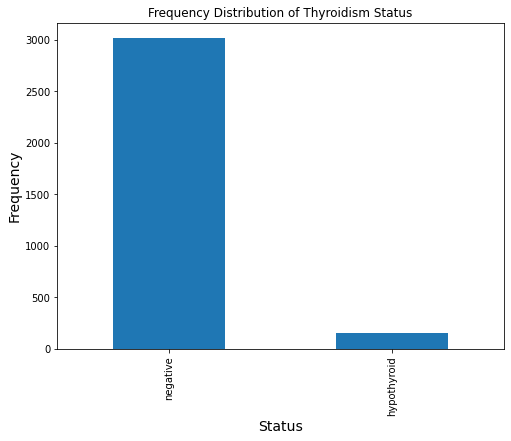

In [127]:
# Checking for the frequency distribution of our target variable Using a bar plot.

fig, ax = plt.subplots(figsize = (8, 6))

Hdf['status'].value_counts().plot.bar(title = 'Frequency Distribution of Thyroidism Status')
plt.xlabel('Status', color = 'black', fontsize = 14)
plt.ylabel('Frequency', color = 'black', fontsize = 14)
plt.show()

Most patient did not have hypothyroidism

## Bivariate analysis

<function matplotlib.pyplot.show>

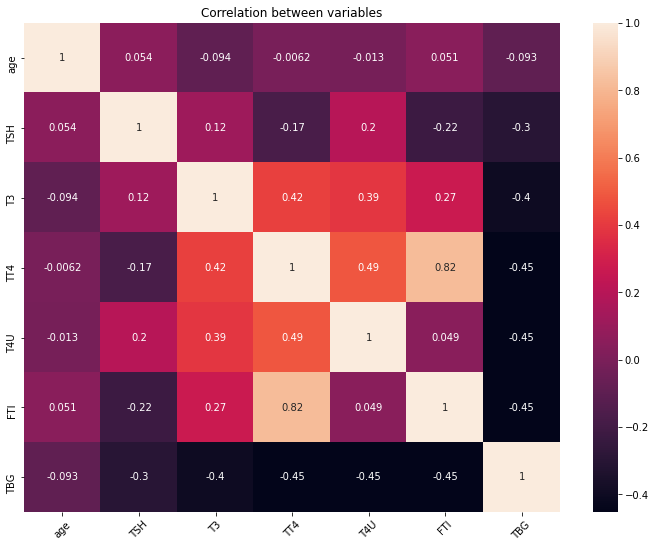

In [124]:
#checking for correlation using spearman method
plt.figure(figsize=(12,9))
cor=Hdf.corr(method = 'spearman')
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot = True)
plt.xticks( rotation=45)
plt.title('Correlation between variables')
plt.show

From the above heat map,we can conclude that;

> TT4 and FTI are highly correlated.

> TT4 and  TT3 are slightly correlated

> T4U and TT4 are also slightly correlated

# Feature engineering

In [0]:
for col in numeric:
  Hdf.fillna(0, inplace = True)
  
# For categorical features
categ =  ['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
       'thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium',
       'goitre','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']

for i in categ:
  Hdf.fillna('null', inplace = True)

In [75]:
# Confirm if any  missing values
Hdf.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [0]:
Hdf1=Hdf.copy()


In [23]:
Hdf1.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,0.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,0.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,0.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,0.0


In [24]:
Hdf1 = Hdf1.drop(["TBG"],axis=1)
Hdf1.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


In [0]:
# Create a dictionary to manually encode the categorical data
dict_data = {"sex": {"M": 1, "F": 0},
              'on_thyroxine': {"t": 1, "f": 0},
               "query_on_thyroxine": {"t": 1, "f": 0},
                "on_antithyroid_medication": {"t": 1, "f": 0},
                "thyroid_surgery": {"t": 1, "f": 0},
                "query_hypothyroid": {"t": 1, "f": 0},
               "query_hyperthyroid": {"t": 1, "f": 0},
                "pregnant": {"t": 1, "f": 0},
                "sick" : {"t": 1, "f": 0},
                "tumor": {"t": 1, "f": 0},
                "lithium": {"t": 1, "f": 0},
                "goitre": {"t": 1, "f": 0},
                 "TSH_measured": {"y": 1, "n": 0},
                 "T3_measured": {"y": 1, "n": 0},
                  "TT4_measured": {"y": 1, "n": 0},
                  "T4U_measured": {"y": 1, "n": 0},
                  "FTI_measured": {"y": 1, "n": 0},
                  "TBG_measured": {"y": 1, "n": 0},
                }
Hdf1.replace(dict_data, inplace=True)

In [26]:
Hdf1.isna().any()

status                       False
age                          False
sex                          False
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
thyroid_surgery              False
query_hypothyroid            False
query_hyperthyroid           False
pregnant                     False
sick                         False
tumor                        False
lithium                      False
goitre                       False
TSH_measured                 False
TSH                          False
T3_measured                  False
T3                           False
TT4_measured                 False
TT4                          False
T4U_measured                 False
T4U                          False
FTI_measured                 False
FTI                          False
TBG_measured                 False
dtype: bool

In [27]:
# Previwing dataset after changes
Hdf1.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,hypothyroid,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,hypothyroid,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0
3,hypothyroid,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0
4,hypothyroid,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0


# Approach one : Decision tree

## Random Forest

In [76]:
# Selecting the independent and target variables
X = Hdf1.drop('status', axis = 1)
y = Hdf1.status

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Modeling

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

comparison_frame.head(5)

,Actual,Predicted
2531,negative,negative
1728,negative,negative
1266,negative,negative
1880,negative,negative
3059,negative,negative


In [31]:
#checking the accuracy of our model
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9826224328593997

In [32]:
# Previewing the parameters to tune
#
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Hyperparameter tuning for RandomForestClassifier

In [35]:

# Hyperparameter tuning the RandomForestClassifier

from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [10, 20, 30, 50, 100], 
          'max_depth' : [1, 2, 3, 4, 5]}

kfold = KFold(n_splits=10, shuffle=True)
forest = RandomForestClassifier()

search = GridSearchCV(forest, param_grid=params, scoring = 'accuracy', cv = kfold)

search.fit(X, y)
search.best_params_

{'max_depth': 5, 'n_estimators': 100}

After tuning our parameters and getting the best parameters to work with,we apply them to our model.

In [36]:
# Fitting the best parameters to the model and observe the performance

forest = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = 5)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

# Evaluating the model performance
accuracy1 = accuracy_score(y_test, y_pred)
accuracy1

0.976303317535545

In [0]:
# Picking a specific tree from the forest
rand_tree = forest.estimators_[2]


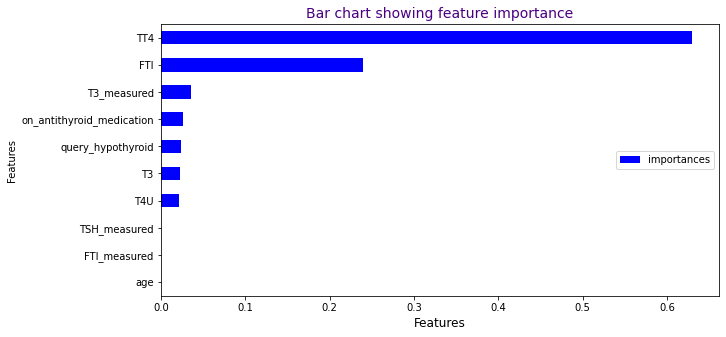

In [50]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
df = pd.DataFrame({'Features': X.columns, 'importances':rand_tree.feature_importances_}).sort_values(by='importances', ascending=False).set_index('Features')

# Creating a bar chart of feature importance in descending order
df = df[:10].sort_values(by = 'importances', ascending = True)
df.plot(kind = 'barh', figsize = (10,5), color = 'blue')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'black')
plt.show()

## Ada boosting

In [55]:
# We start with a Decision Tree Baseline Model
# This serves the purpose of comparison
#--------

crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
for depth in range (1,10):
    tree_classifier=tree.DecisionTreeClassifier(max_depth=depth,random_state=1)
    if tree_classifier.fit(X,y).tree_.max_depth<depth:
        break
    score=np.mean(cross_val_score(tree_classifier,X,y,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(depth, score)

1 0.9680669248891907
2 0.982296450105818
3 0.9892474943097872
4 0.9889310386135846
5 0.9889330351794913
6 0.9882991255041327
7 0.9867188435890268
8 0.9867188435890271
9 0.9879816715249771


In [0]:
ad_boost = AdaBoostClassifier()
ad_boost = ad_boost.fit(X_train, y_train)
ad_pred = ad_boost.predict(X_test)

In [72]:
# Evaluating the model performance
accuracy2 = accuracy_score(y_test, y_pred)
accuracy2

0.976303317535545

### Hyperparameter tuning for Adaboost classifier

In [0]:
ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,900,1000],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=crossvalidation)

In [57]:
search.fit(X,y)
search.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [58]:
search.best_score_

0.991459689334345

In [69]:
score=np.mean(cross_val_score(ada,X,y,scoring='accuracy',cv=crossvalidation,n_jobs=1))
score

0.9905133170945973

From the best parameters that we get from hyperparameter tuning,we go ahead to apply them and get the results

In [0]:
ad_boost = AdaBoostClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
ad_boost = ad_boost.fit(X_train, y_train)
ad_pred = ad_boost.predict(X_test)

In [67]:
# Evaluating the model performance
accuracy3 = accuracy_score(y_test, y_pred)
accuracy3

0.976303317535545

## Gradient boosting

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained, note that we apply it to the whole data set this time
y_pred_tree = tree.predict(X)

In [80]:
# Implementing cross validation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score
classifier = []
res = []
names = []
classifier.append(('GradientBoost',  GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth= 4)))
for name, model in classifier:
 kfold = KFold(n_splits=5, random_state=0)
 cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
 res.append(cv_results)
 names.append(name)
 accuracy_message = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(accuracy_message)

GradientBoost: 0.991304 (0.002681)


In [81]:
# Evaluating the model performance
accuracy4 = accuracy_score(y_test, y_pred)
accuracy4

0.9826224328593997

## Summary of approach one

The folowing are the accuracy scores of the models that we have built under the first approach;

>1.   RandomForestClassifier -  97.63%
>2.   AdaBoostingClassifier - 97.63%
>3.   GradientBoostingClassifier - 98.26%

We can therefore conclude that the most accurate model is the GradientBoostingClassifier.

The most important feature as seen in the bar chart showing feature importance based on RandomForestClassifier are;

> * TT4
> * FT1
> * T3_measured
> * on_antithyroid_medication
> * query_hypothyroid
> * T3
> * T40

in that order.

# Approach 2: Support Vector Machine

In [0]:
# Imputing the missing values
Hdf1['age'].fillna(Hdf1['age'].mean(), inplace = True)
Hdf1['sex'].fillna(0, inplace = True)
Hdf1['TSH'].fillna(Hdf1['TSH'].mean(), inplace = True)
Hdf1['T3'].fillna(Hdf1['T3'].median(), inplace = True)
Hdf1['TT4'].fillna(Hdf1['TT4'].median(), inplace = True)
Hdf1['FTI'].fillna(Hdf1['FTI'].median(), inplace = True)
Hdf1['T4U'].fillna(Hdf1['T4U'].mean(), inplace = True)


## Linear kernel

In [0]:
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
#importing library and setting kernel to linear
from sklearn.svm import SVC,LinearSVC
Hypothyroid_model = SVC(kernel = 'linear', random_state=0)

In [119]:
#fitting our train dataset
Hypothyroid_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [120]:
#predicting with the test set
y_pred = Hypothyroid_model.predict(X_test)
y_pred

array(['negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'hypothyroid', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'hypothyroid', 'negative', 'negative',
       'negative', 'negative', 'hypothyroid', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative'

In [121]:
#Checking the accuracy of model
accuracy5 = accuracy_score(y_test, y_pred)
accuracy5

0.976303317535545

In [122]:
#Checking the performance of the model through the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 17,   9],
       [  6, 601]])

## Polynomial kernel

In [0]:
#Setting the kernel to polynormial
polyclassifier = SVC(kernel = 'poly', degree = 4, gamma='auto')

In [104]:
#fitting the model into the training set
polyclassifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#predictions based on the x_test dataset
y_pred = polyclassifier.predict(X_test)


In [110]:
#Checking the accuracy of model
accuracy6 = accuracy_score(y_test, y_pred)
accuracy6

0.976303317535545

In [111]:
#Checking the performance of the model through the confusion matrix
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[ 21,   5],
       [ 10, 597]])

## RBF kernel

In [0]:
#setting the kernel to rbf
rbf = SVC(kernel = 'rbf')

In [113]:
#fitting the training dataset
rbf.fit(X_train, y_train)
#checking predicted values
y_pred = rbf.predict(X_test)
#Evaluating the accuracy of our model 
accuracy3 =accuracy_score(y_test, y_pred)
accuracy3

0.9747235387045814

In [114]:
#Checking the performance of the model through the confusion matrix
cm2 = confusion_matrix(y_test, y_pred)
cm2

array([[ 16,  10],
       [  6, 601]])

## Summary of approach two

The following are the accuracy scores of the models that we have bulit in the second approach.

> 1. Linear kernel - 97.63%
> 2. Polynomial kernel - 97.63%
> 3. RBF kernel - 97.47%

This shows that in this case linear and plynomial are slightly better than RBF.